# Part 1: Data Preparation &amp; Analysis

## Data Preparation and Cleaning



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

### Forming "Wine" Dataset

The data is provided in five separate files - "Red", "Rose", "Sparkling", "White", and "Varieties". However, we will only use the first four as "Varieties" is irrelevant to our study.

In [ ]:
red = pd.read_csv('data/Red.csv')
rose = pd.read_csv('data/Rose.csv')
sparkling = pd.read_csv('data/Sparkling.csv')
white = pd.read_csv('data/White.csv')
red.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016


As the "Varieties" file is not linked to the other four datasets, we will not be using it in our study.

In [ ]:
Data Preparation and EDAvarieties = pd.read_csv('data/Varieties.csv')
varieties

,Variety
0,Abouriou
1,Abrustine
2,Absinthe
3,Acadie Blanc
4,Acolon
...,...
1507,Zengő
1508,Zéta
1509,Zeusz
1510,Žilavka


We have created a new "Type" column for the wines, as we will be concatenating the four datasets.

In [ ]:
red['Type'] = 'Red'
white['Type'] = 'White'
sparkling['Type'] = 'Sparkling'
rose['Type'] = 'Rose'
wine = pd.concat([red, rose, white, sparkling], ignore_index=True)

In [ ]:
wine

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,Red
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,Red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Red
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,Red
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,Red
...,...,...,...,...,...,...,...,...,...
13829,Special Cuvée Brut Aÿ Champagne N.V.,France,Champagne,Bollinger,4.2,37765,46.00,N.V.,Sparkling
13830,Brut Premier Champagne N.V.,France,Champagne Premier Cru,Louis Roederer,4.2,40004,36.48,N.V.,Sparkling
13831,Impérial Brut Champagne N.V.,France,Champagne,Moët & Chandon,4.1,76037,40.61,N.V.,Sparkling
13832,Brut (Carte Jaune) Champagne N.V.,France,Champagne,Veuve Clicquot,4.2,86839,43.60,N.V.,Sparkling


There are 13834 rows, but only 10934 distinct wine names, meaning there are rows with same wine names. Hence, we will proceed to clean the dataset.

### Removing Missing Data and Duplicates

#### Extracting Duplicate Values of "Name" Variable

In [ ]:
wine['Name'].value_counts().loc[lambda x: x>1]

Chardonnay 2018                                78
Sauvignon Blanc 2019                           66
Sauvignon Blanc 2018                           51
Cabernet Sauvignon 2017                        43
Cabernet Sauvignon 2016                        41
                                               ..
Trebbiano d'Abruzzo 2017                        2
Barbaresco 2013                                 2
Brut Champagne Grand Cru 'Aÿ' N.V.              2
Graacher Himmelreich Riesling Spätlese 2015     2
Sauvignon Blanc 2020                            2
Name: Name, Length: 770, dtype: int64

There are repeated values for 770 different wines. However, as wines may have similar names, we have to check if the corresponding variables have similar values as well.

In [ ]:
wine.loc[wine['Name'].value_counts().loc[lambda x: x>1]]

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type
78,Pinot Noir 2016,New Zealand,Marlborough,Clos Henri Vineyard,3.9,102,27.78,2016,Red
66,Fausto Tannat 2015,Brazil,Serra Gaúcha,Pizzato,3.6,1012,11.35,2015,Red
51,El Abuelo Selección Edición Limitada 2013,Spain,Almansa,Bodegas Piqueras,4.2,101,10.95,2013,Red
43,Roma Rosso 2018,Italy,Lazio,Poggio le Volpi,4.0,101,9.95,2018,Red
41,Cuvée Alienor Fronsac 2015,France,Fronsac,Château Mayne-Vieil,3.7,101,16.47,2015,Red
...,...,...,...,...,...,...,...,...,...
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Red


#### Analysis of Data Points with "Name" as "Chardonnay 2018"

As "Chardonnay 2018" is the most frequently repeated name, we will use it to investigate the relationship between "Name" and the other variables.

In [ ]:
wine.loc[wine['Name'] == 'Chardonnay 2018']

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type
9066,Chardonnay 2018,Germany,Rheinhessen,Krämer - Straight,3.9,25,8.99,2018,White
9221,Chardonnay 2018,Austria,Mittelburgenland,Gesellmann,3.5,27,15.90,2018,White
9239,Chardonnay 2018,France,Pays d'Oc,Abbotts & Delaunay,3.7,28,6.73,2018,White
9271,Chardonnay 2018,United States,North Coast,Ghost Pines,3.8,28,13.47,2018,White
9309,Chardonnay 2018,South Africa,Cape Town,Cape Town Wine Co,3.0,29,7.50,2018,White
...,...,...,...,...,...,...,...,...,...
12739,Chardonnay 2018,United States,California,Bogle,3.8,898,14.36,2018,White
12753,Chardonnay 2018,Argentina,Mendoza,Catena,4.0,979,15.79,2018,White
12768,Chardonnay 2018,United States,California,Woodbridge by Robert Mondavi,3.4,1100,8.72,2018,White
12769,Chardonnay 2018,Italy,Menfi,Planeta,4.2,1116,22.80,2018,White


It appears that most of the wines with similar names are not duplicates - they come from different regions, countries, and wineries; they also have different values for the other variables.

In [ ]:
wine.loc[(wine['Name'] == 'Chardonnay 2018') & (wine['Region'] == 'Pays d\'Oc')]

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type
9239,Chardonnay 2018,France,Pays d'Oc,Abbotts & Delaunay,3.7,28,6.73,2018,White
9325,Chardonnay 2018,France,Pays d'Oc,Domaine d'Aubaret,3.5,29,6.95,2018,White
9708,Chardonnay 2018,France,Pays d'Oc,Les Salices,3.5,36,7.10,2018,White
9926,Chardonnay 2018,France,Pays d'Oc,Cap Cette,3.3,41,7.50,2018,White
10150,Chardonnay 2018,France,Pays d'Oc,Croix d'Or,3.8,47,6.90,2018,White
11833,Chardonnay 2018,France,Pays d'Oc,Domaines Astruc,3.7,165,6.50,2018,White
12010,Chardonnay 2018,France,Pays d'Oc,La Chevalière,3.7,199,7.89,2018,White
12116,Chardonnay 2018,France,Pays d'Oc,Baron Philippe de Rothschild,3.5,226,8.78,2018,White
12352,Chardonnay 2018,France,Pays d'Oc,Paul Mas,3.7,311,5.50,2018,White
12634,Chardonnay 2018,France,Pays d'Oc,Les Jamelles,3.6,570,5.69,2018,White


Wines with the same name, coming from the same region, can also be different. For example, while there are multiple wines named "Chardonnay 2018" that come from "Pays d'Oc" in France, they are not duplicates. They come from different wineries, and have different values for the other variables. We can conclude that duplicate wines are likely those that have the same "Name", "Region", and "Winery" values, as it is likely that a specific winery in a certain region only produces one type of wine with a specific name. Hence, we will use "Winery" to check for duplicate values in the dataset.

#### Combining "Name" and "Winery" to check for duplicate values

In [ ]:
wine['Name+Winery'] = wine['Name'] + ' ' + wine['Winery']
wine

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type,Name+Winery
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,Red,Pomerol 2011 Château La Providence
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,Red,Lirac 2017 Château Mont-Redon
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Red,Erta e China Rosso di Toscana 2015 Renzo Masi
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,Red,Bardolino 2019 Cavalchina
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,Red,Ried Scheibner Pinot Noir 2016 Markowitsch
...,...,...,...,...,...,...,...,...,...,...
13829,Special Cuvée Brut Aÿ Champagne N.V.,France,Champagne,Bollinger,4.2,37765,46.00,N.V.,Sparkling,Special Cuvée Brut Aÿ Champagne N.V. Bollinger
13830,Brut Premier Champagne N.V.,France,Champagne Premier Cru,Louis Roederer,4.2,40004,36.48,N.V.,Sparkling,Brut Premier Champagne N.V. Louis Roederer
13831,Impérial Brut Champagne N.V.,France,Champagne,Moët & Chandon,4.1,76037,40.61,N.V.,Sparkling,Impérial Brut Champagne N.V. Moët & Chandon
13832,Brut (Carte Jaune) Champagne N.V.,France,Champagne,Veuve Clicquot,4.2,86839,43.60,N.V.,Sparkling,Brut (Carte Jaune) Champagne N.V. Veuve Clicquot


In [ ]:
wine['Name+Winery'].value_counts().loc[lambda x: x>1]

Cabernet Sauvignon 2016 Louis M. Martini    2
Grande Cuvée 2017 Salzl Seewinkelhof        2
Old Vine Zinfandel 2016 Ravenswood          2
Mâcon-Villages 2018 Joseph Drouhin          2
Name: Name+Winery, dtype: int64

There are a total of 4 types of wines containing a duplicate entry with the same Name and Winery. We will now carry out further investigation to check if the other variables are duplicates as well.

In [ ]:
wine.loc[wine['Name+Winery'].isin(wine['Name+Winery'].value_counts().loc[lambda x: x>1].index.values)]

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type,Name+Winery
1801,Old Vine Zinfandel 2016,United States,Lodi,Ravenswood,3.8,1711,15.49,2016,Red,Old Vine Zinfandel 2016 Ravenswood
2574,Cabernet Sauvignon 2016,United States,Napa Valley,Louis M. Martini,4.1,2216,30.43,2016,Red,Cabernet Sauvignon 2016 Louis M. Martini
3552,Cabernet Sauvignon 2016,United States,Sonoma County,Louis M. Martini,3.8,2882,17.79,2016,Red,Cabernet Sauvignon 2016 Louis M. Martini
5890,Old Vine Zinfandel 2016,United States,Sonoma County,Ravenswood,4.0,49,25.99,2016,Red,Old Vine Zinfandel 2016 Ravenswood
8335,Grande Cuvée 2017,Austria,Burgenland,Salzl Seewinkelhof,3.9,91,14.35,2017,Red,Grande Cuvée 2017 Salzl Seewinkelhof
8348,Grande Cuvée 2017,Austria,Burgenland,Salzl Seewinkelhof,3.9,91,17.29,2017,Red,Grande Cuvée 2017 Salzl Seewinkelhof
12702,Mâcon-Villages 2018,France,Mâcon-Villages,Joseph Drouhin,3.8,731,11.40,2018,White,Mâcon-Villages 2018 Joseph Drouhin
12703,Mâcon-Villages 2018,France,Mâcon-Villages,Joseph Drouhin,3.8,731,13.60,2018,White,Mâcon-Villages 2018 Joseph Drouhin


Observing the dataframe above, we realised that there are also wines with the same name and winery, but are from different regions - namely, Old Vine Zinfandel 2016. Hence, they are not duplicates. 

However, there is duplicate data for Grande Cuvée 2017 and Mâcon-Villages 2018 (same name, region and winery). We have decided to drop the rows containing a lower price.

In [ ]:
wine = wine.drop([8335, 12702])
wine.loc[wine['Name+Winery'].isin(wine['Name+Winery'].value_counts().loc[lambda x: x>1].index.values)]

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type,Name+Winery
1801,Old Vine Zinfandel 2016,United States,Lodi,Ravenswood,3.8,1711,15.49,2016,Red,Old Vine Zinfandel 2016 Ravenswood
2574,Cabernet Sauvignon 2016,United States,Napa Valley,Louis M. Martini,4.1,2216,30.43,2016,Red,Cabernet Sauvignon 2016 Louis M. Martini
3552,Cabernet Sauvignon 2016,United States,Sonoma County,Louis M. Martini,3.8,2882,17.79,2016,Red,Cabernet Sauvignon 2016 Louis M. Martini
5890,Old Vine Zinfandel 2016,United States,Sonoma County,Ravenswood,4.0,49,25.99,2016,Red,Old Vine Zinfandel 2016 Ravenswood


#### Checking for NULL Values

In [ ]:
wine.isnull().sum().sum()

0

As there are no NULL values in the dataset, removal will not be necessary.

## Exploratory Data Analysis

### General Data Analysis

In [ ]:
wine.describe()

,Rating,NumberOfRatings,Price
count,13832.000000,13832.000000,13832.000000
mean,3.865667,428.324971,33.027764
std,0.296448,1838.542688,70.904602
min,2.200000,25.000000,3.150000
25%,3.700000,56.000000,9.900000
50%,3.900000,129.000000,15.950000
75%,4.100000,336.000000,32.500000
max,4.900000,94287.000000,3410.790000


In [ ]:
wine.dtypes

Name                object
Country             object
Region              object
Winery              object
Rating             float64
NumberOfRatings      int64
Price              float64
Year                object
Type                object
Name+Winery         object
dtype: object

In [ ]:
print("Unique Values for Country: ", wine['Country'].nunique())
print("Unique Values for Region: ", wine['Region'].nunique())
print("Unique Values for Winery: ", wine['Winery'].nunique())
print("Unique Values for Name: ", wine['Name'].nunique())

Unique Values for Country:  33
Unique Values for Region:  861
Unique Values for Winery:  3505
Unique Values for Name:  10934


We have decided to predict 'Price' based on the variables: 'Year', 'Rating', 'Country'.

The dataset consists of both numerical and categorical variables. For the 'Name', 'Winery', and 'Region', there are a large number of unique values that will make it difficult to analyse. Hence, we have chosen to use two numerical variables, and 'Country', which has the least number of unique values.

### Analysis of 'Price' - Response

#### Histogram of 'Price'

<AxesSubplot:xlabel='Price', ylabel='Count'>

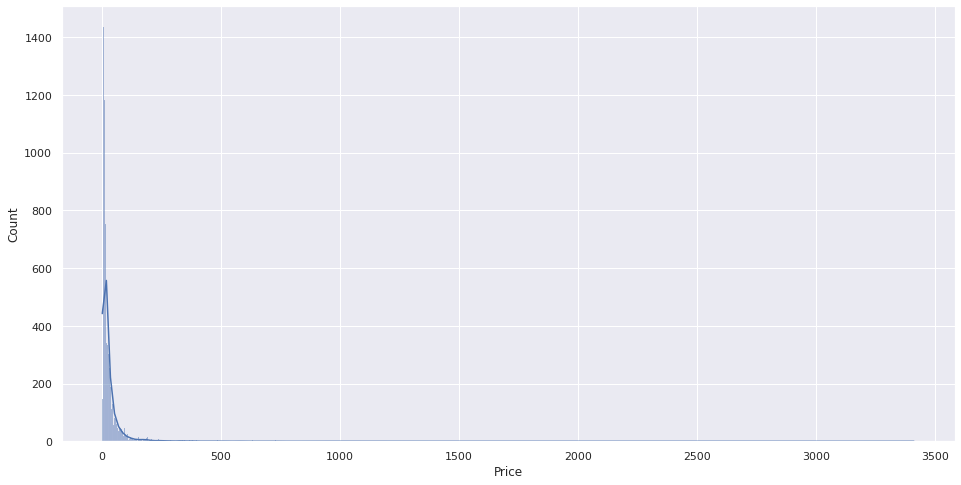

In [ ]:
f = plt.figure(figsize=(16,8))
sb.histplot(data = wine['Price'], kde = True)

#### Violin Plot of 'Price'

<AxesSubplot:>

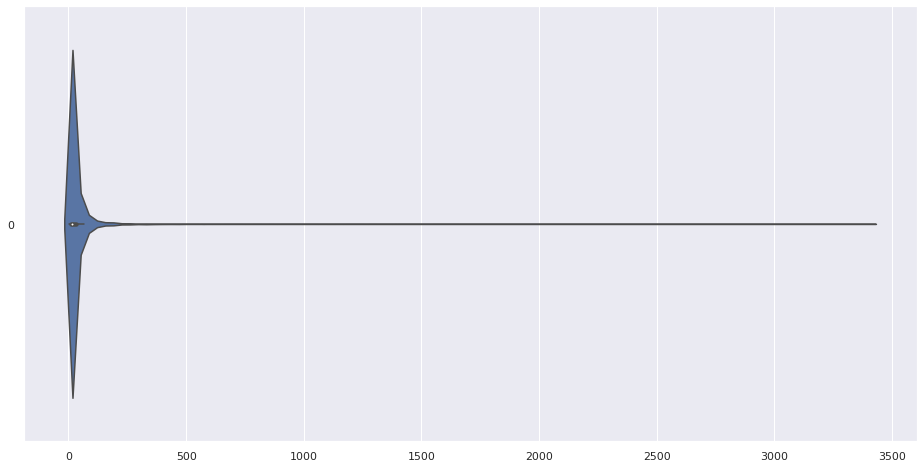

In [ ]:
f = plt.figure(figsize=(16,8))
sb.violinplot(data = wine['Price'], orient = "h")

The range of data for 'Price' has a very wide range, from 3.15 to 3410.79. However, the data is mostly concentrated around the lower range, with a median of only 15.95.

In [ ]:
Q1price = wine['Price'].quantile(0.25)
Q3price = wine['Price'].quantile(0.75)
IQRprice = Q3price - Q1price
num_price_outliers = ((wine['Price'] < Q1price-1.5*IQRprice) | (wine['Price'] > Q3price+1.5*IQRprice)).sum()

print("Number of price outliers: " + str(num_price_outliers))
print(f"Percentage of price as outliers(%): {num_price_outliers/wine.shape[0]*100:0.2f}")

Number of price outliers: 1313
Percentage of price as outliers(%): 9.49


We have chosen not to remove outliers for Price, as they represent natural variations in the data rather than data that is poorly processed, wrongfully measured or sampling errors. 

### Analysis of 'Year'

In [ ]:
wine['Year'].unique()

array(['2011', '2017', '2015', '2019', '2016', '2014', '2013', '2018',
       '2012', '2010', '2007', '2005', '1999', '2002', '2008', '2006',
       '2009', 'N.V.', '2000', '2004', '2001', '1996', '1998', '1990',
       '1995', '2003', '1993', '1988', '1989', '1997', '1992', '1991',
       '2020', '1961'], dtype=object)

#### Explanation of value 'N.V.'

N.V is non vintage wine, which is made by blending grapes from different years together, hence it has no single date attributed to it. We have replaced all values of 'N.V.' with '2023'.

In [ ]:
wine['Year'] = wine['Year'].replace('N.V.', '2023')

In [ ]:
#convert Year to int64 for easier modelling
wine = wine.astype({'Year':'int64'})

In [ ]:
wine.dtypes

Name                object
Country             object
Region              object
Winery              object
Rating             float64
NumberOfRatings      int64
Price              float64
Year                 int64
Type                object
Name+Winery         object
dtype: object

<AxesSubplot:xlabel='Year', ylabel='Count'>

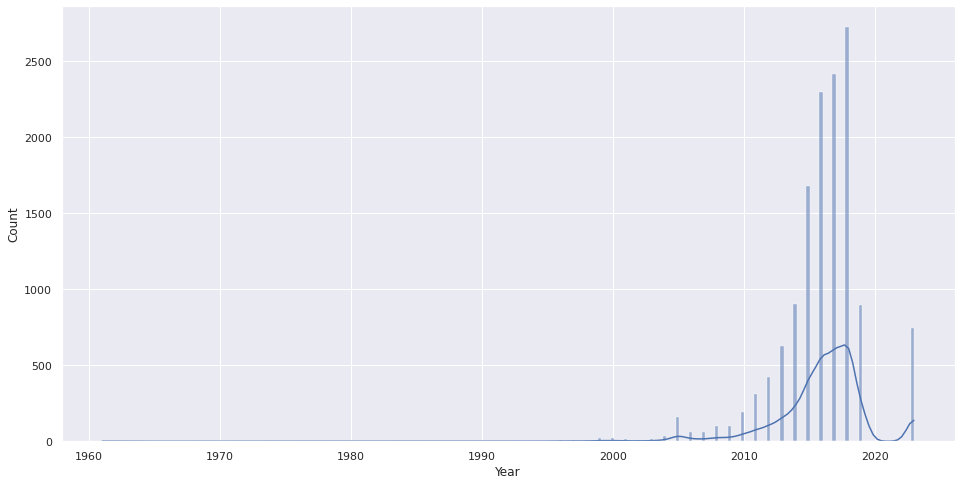

In [ ]:
f = plt.figure(figsize=(16,8))
sb.histplot(data = wine['Year'], kde = True)


In [ ]:
Q1year = wine['Year'].quantile(0.25)
Q3year = wine['Year'].quantile(0.75)
IQRyear = Q3year - Q1year
num_year_outliers = ((wine['Year'] < Q1year-1.5*IQRyear) | (wine['Price'] > Q3year+1.5*IQRyear)).sum()

print("Number of Year outliers: " + str(num_year_outliers))
print(f"Percentage of Year as outliers(%): {num_year_outliers/wine.shape[0]*100:0.2f}")

Number of Year outliers: 825
Percentage of Year as outliers(%): 5.96


In [ ]:
wine_groupby_year = pd.DataFrame(wine.groupby('Year')['Price'].mean())
#plt.figure(figsize=(24,24))
#g = sb.histplot(data = wine_groupby_year, y='Price', x=wine_groupby_year.index)
#plt.show()
wine_groupby_year

,Price
Year,
1961,18.920000
1988,209.600000
1989,1046.925000
1990,623.735000
1991,866.590000
1992,810.943333
1993,650.875000
1995,186.485000
1996,160.061667


In [ ]:
#wine = pd.cut(wine['Year'], bins=[2000, 2010, 2021, 2022], include_lowest=True, labels=['Before 2000s', '2000-2010', '2011-2022','N.V.'])
#wine

### Analysis of 'Rating'

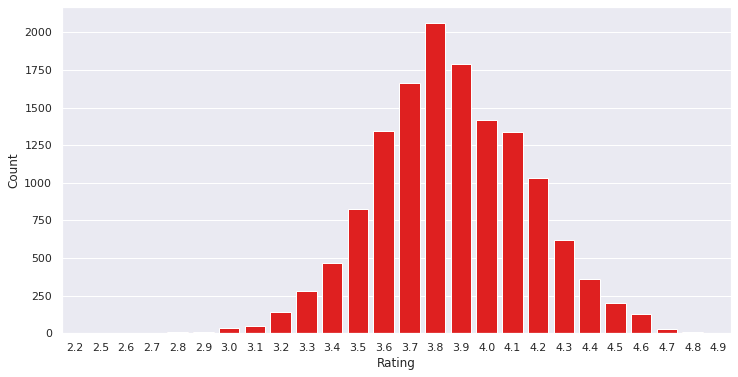

In [ ]:
plt.figure(figsize=(12,6))
g = sb.countplot(data=wine, x='Rating', color='red')
g.set_xlabel("Rating") 
g.set_ylabel("Count")
plt.show()

Rating seems to have a fairly normal distribution

In [ ]:
Q1rating = wine['Rating'].quantile(0.25)
Q3rating = wine['Rating'].quantile(0.75)
IQRrating = Q3rating - Q1rating
num_rating_outliers = ((wine['Rating'] < Q1rating-1.5*IQRrating) | (wine['Rating'] > Q3rating+1.5*IQRrating)).sum()

print("Number of rating outliers: " + str(num_rating_outliers))
print(f"Percentage of rating as outliers(%): {num_rating_outliers/wine.shape[0]*100:0.2f}")

Number of rating outliers: 144
Percentage of rating as outliers(%): 1.04


Number of outliers in rating is very minimal

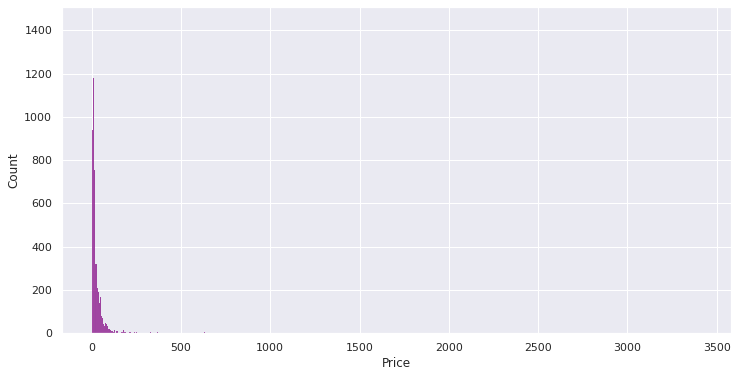

In [ ]:
plt.figure(figsize=(12,6))
g = sb.histplot(data=wine, x='Price', color='purple')
g.set_xlabel("Price") 
g.set_ylabel("Count")
plt.show()

<Figure size 1728x1728 with 0 Axes>

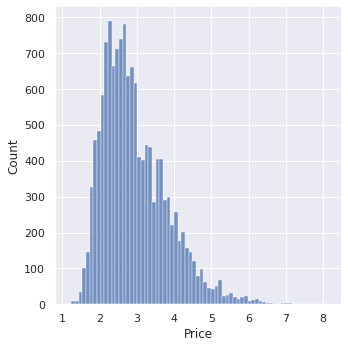

In [ ]:
plt.figure(figsize=(24,24))
g = sb.displot(np.log(wine['Price']))
plt.show()

### Analysis of 'Country'

In [ ]:
wine.Country.value_counts()

Italy             3919
France            3435
Spain             1533
Germany           1229
South Africa       846
United States      530
Austria            491
Chile              431
Portugal           336
Australia          318
Argentina          308
New Zealand        165
Brazil              50
Romania             37
Greece              25
Switzerland         23
Israel              23
Hungary             19
Slovenia            18
Lebanon             16
Moldova             16
Luxembourg          14
Georgia             13
Turkey              10
Croatia              6
Uruguay              5
China                3
Canada               3
United Kingdom       3
Slovakia             2
Czech Republic       2
Bulgaria             2
Mexico               1
Name: Country, dtype: int64

In [ ]:
wine.Country.value_counts()[:12].sum()

13541

We decided to pick countries with more than 100 wines

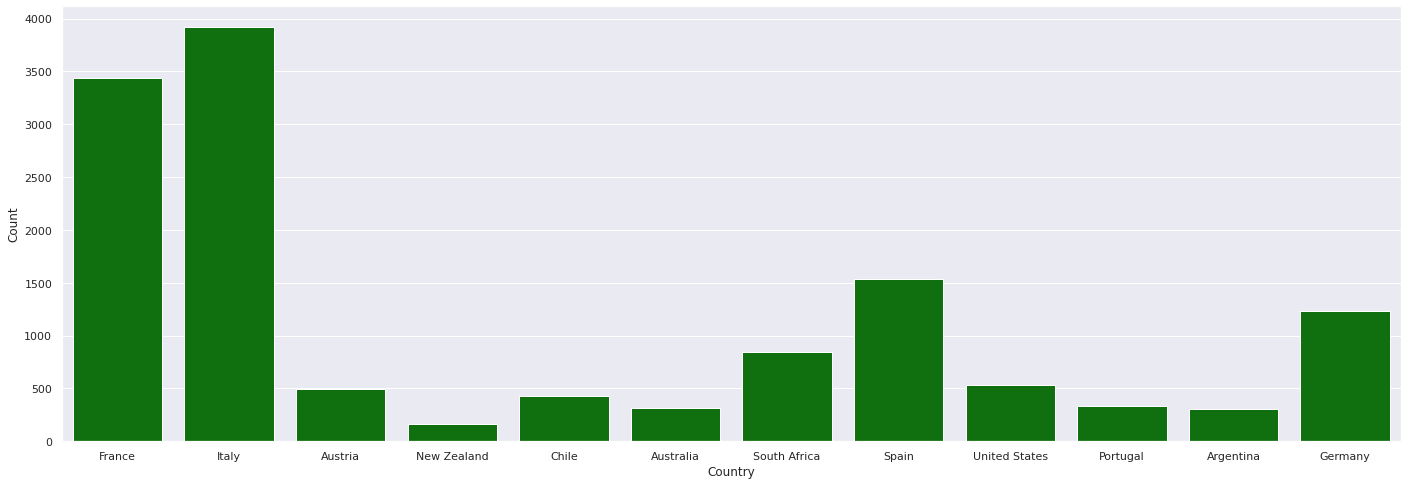

In [ ]:
plt.figure(figsize=(24,8))
g = sb.countplot(data=wine[wine.Country.isin(wine.Country.value_counts()[:12].index.values)], x="Country", color='green')
g.set_xlabel("Country") 
g.set_ylabel("Count")
plt.show()

<Figure size 1728x576 with 0 Axes>

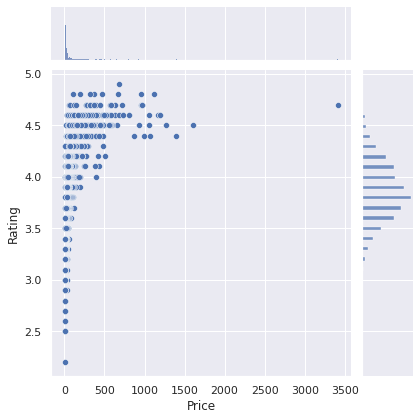

In [ ]:
plt.figure(figsize=(24,8))
g = sb.jointplot(data=wine, x='Price', y='Rating')
plt.show()

Using One-Hot Encoding to encode Country.

In [ ]:
wineNew = wine[wine.Country.isin(wine.Country.value_counts()[:12].index.values)]
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
wineNew_cat = wineNew[['Country']]
ohe.fit(wineNew_cat)
wineNew_cat_ohe = pd.DataFrame(ohe.transform(wineNew_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(wineNew_cat.columns))

# Check the encoded variables
wineNew_cat_ohe.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13541 entries, 0 to 13540
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country_Argentina      13541 non-null  float64
 1   Country_Australia      13541 non-null  float64
 2   Country_Austria        13541 non-null  float64
 3   Country_Chile          13541 non-null  float64
 4   Country_France         13541 non-null  float64
 5   Country_Germany        13541 non-null  float64
 6   Country_Italy          13541 non-null  float64
 7   Country_New Zealand    13541 non-null  float64
 8   Country_Portugal       13541 non-null  float64
 9   Country_South Africa   13541 non-null  float64
 10  Country_Spain          13541 non-null  float64
 11  Country_United States  13541 non-null  float64
dtypes: float64(12)
memory usage: 1.2 MB


In [ ]:
wineNew_cat_ohe

,Country_Argentina,Country_Australia,Country_Austria,Country_Chile,Country_France,Country_Germany,Country_Italy,Country_New Zealand,Country_Portugal,Country_South Africa,Country_Spain,Country_United States
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13536,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13537,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13538,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13539,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
wineNew = wineNew.reset_index()
wineNew

,index,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type,Name+Winery
0,0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,Red,Pomerol 2011 Château La Providence
1,1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,Red,Lirac 2017 Château Mont-Redon
2,2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Red,Erta e China Rosso di Toscana 2015 Renzo Masi
3,3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,Red,Bardolino 2019 Cavalchina
4,4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,Red,Ried Scheibner Pinot Noir 2016 Markowitsch
...,...,...,...,...,...,...,...,...,...,...,...
13536,13829,Special Cuvée Brut Aÿ Champagne N.V.,France,Champagne,Bollinger,4.2,37765,46.00,2023,Sparkling,Special Cuvée Brut Aÿ Champagne N.V. Bollinger
13537,13830,Brut Premier Champagne N.V.,France,Champagne Premier Cru,Louis Roederer,4.2,40004,36.48,2023,Sparkling,Brut Premier Champagne N.V. Louis Roederer
13538,13831,Impérial Brut Champagne N.V.,France,Champagne,Moët & Chandon,4.1,76037,40.61,2023,Sparkling,Impérial Brut Champagne N.V. Moët & Chandon
13539,13832,Brut (Carte Jaune) Champagne N.V.,France,Champagne,Veuve Clicquot,4.2,86839,43.60,2023,Sparkling,Brut (Carte Jaune) Champagne N.V. Veuve Clicquot


In [ ]:
wineNew = wineNew.drop('Name+Winery', axis=1)
wineNew_ohe = pd.concat([wineNew, wineNew_cat_ohe], sort = False, axis = 1).reindex(index=wineNew.index)
wineNew_ohe

,index,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type,...,Country_Austria,Country_Chile,Country_France,Country_Germany,Country_Italy,Country_New Zealand,Country_Portugal,Country_South Africa,Country_Spain,Country_United States
0,0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,Red,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,Red,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Red,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,Red,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,Red,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13536,13829,Special Cuvée Brut Aÿ Champagne N.V.,France,Champagne,Bollinger,4.2,37765,46.00,2023,Sparkling,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13537,13830,Brut Premier Champagne N.V.,France,Champagne Premier Cru,Louis Roederer,4.2,40004,36.48,2023,Sparkling,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13538,13831,Impérial Brut Champagne N.V.,France,Champagne,Moët & Chandon,4.1,76037,40.61,2023,Sparkling,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13539,13832,Brut (Carte Jaune) Champagne N.V.,France,Champagne,Veuve Clicquot,4.2,86839,43.60,2023,Sparkling,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Trying out Analysis of Variance (ANOVA)

In [ ]:
wineNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13541 entries, 0 to 13833
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             13541 non-null  object 
 1   Country          13541 non-null  object 
 2   Region           13541 non-null  object 
 3   Winery           13541 non-null  object 
 4   Rating           13541 non-null  float64
 5   NumberOfRatings  13541 non-null  int64  
 6   Price            13541 non-null  float64
 7   Year             13541 non-null  int64  
 8   Type             13541 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.5+ MB


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Outlier Analysis

<Figure size 720x720 with 0 Axes>

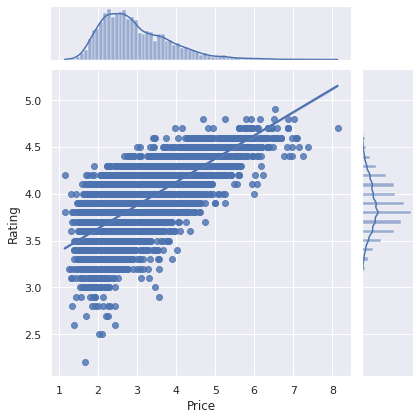

In [ ]:
plt.figure(figsize=(10,10))
g = sb.jointplot(data=wine, x=np.log(wine['Price']), y='Rating', kind='reg')
plt.show()

# Predicting Price using Rating and Year

In [ ]:
Rating = wineNew_ohe['Rating']
Price = wineNew_ohe['Price']
Year = wineNew_ohe['Year']
RVP = pd.concat([Rating,Price,Year],axis=1)

In [ ]:
RVP.corr()

,Rating,Price,Year
Rating,1.000000,0.454323,-0.323346
Price,0.454323,1.000000,-0.349953
Year,-0.323346,-0.349953,1.000000


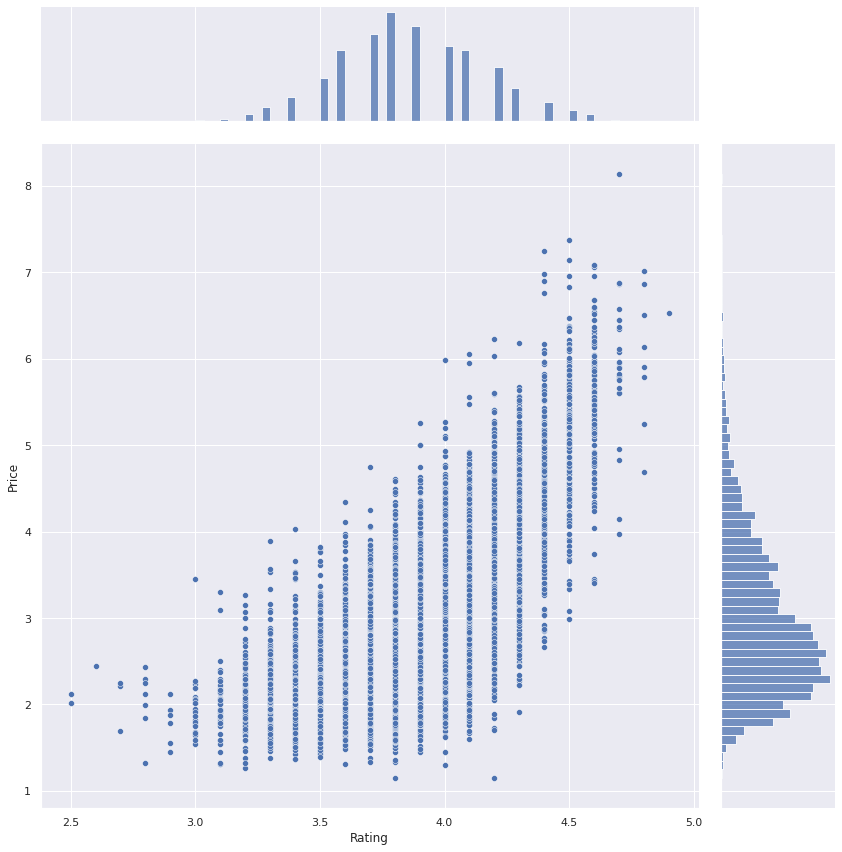

In [ ]:
sb.jointplot(data = RVP, x = Rating, y = np.log(wineNew_ohe['Price']), height = 12)

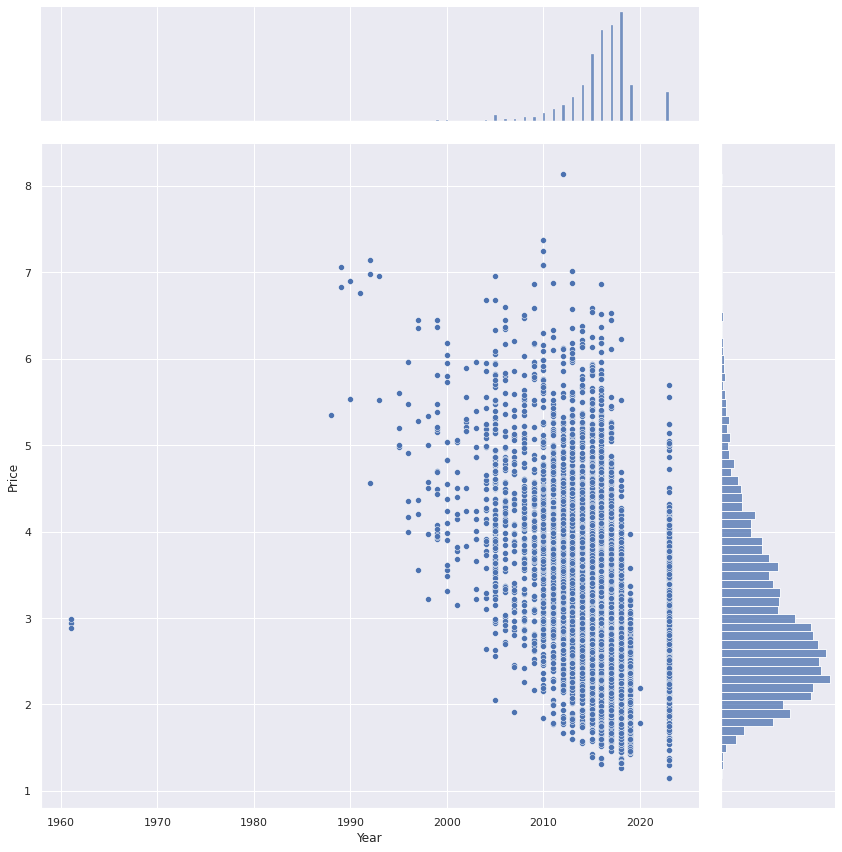

In [ ]:
sb.jointplot(data = RVP, x = Year, y = np.log(wineNew_ohe['Price']), height = 12)

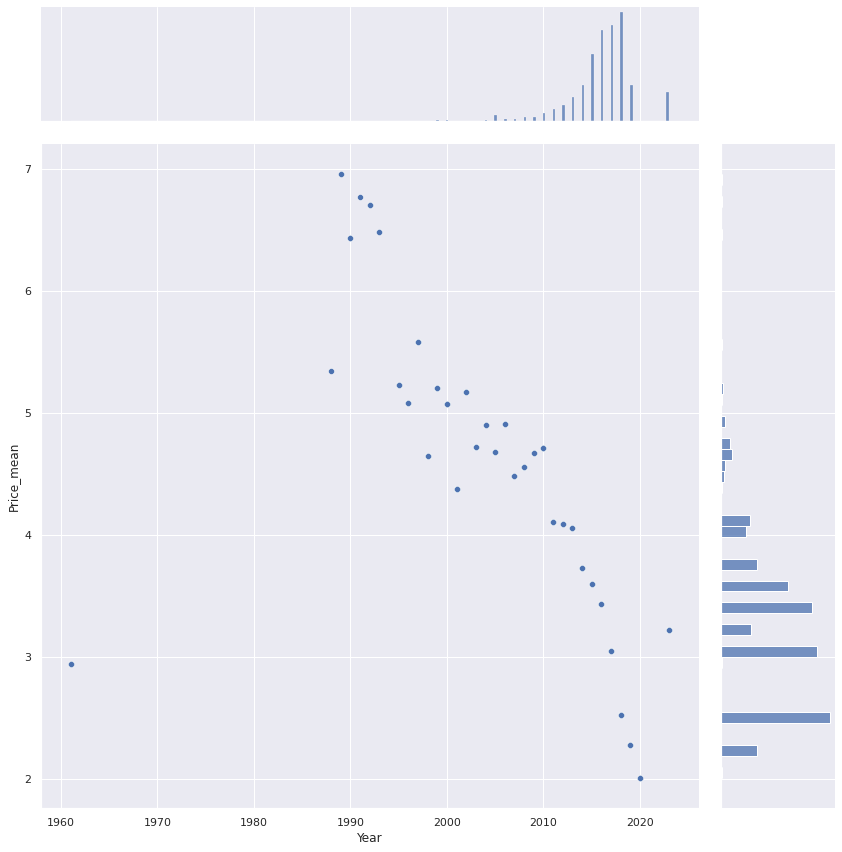

In [ ]:
wineNew_ohe2 = wineNew_ohe.copy()
wineNew_ohe2['Price_mean'] = wineNew_ohe.groupby('Year').Price.transform(lambda s: s.mean())
Price_mean = wineNew_ohe2['Price_mean']
Year2 = wineNew_ohe2['Year']

RVP2 = pd.concat([Price_mean, Year],axis=1)

sb.jointplot(data = RVP2, x = Year, y = np.log(wineNew_ohe2['Price_mean']), height = 12)


In [ ]:
wineNew_ohe.to_csv('data/wineNew_ohe.csv',index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5b7597f1-b868-415e-a8ba-1d5a47f19376' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>